In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [206]:
df = pd.read_csv('CSV/Travel.csv')

In [207]:
df

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


In [208]:
df.isnull().sum().sort_values(ascending=False)

DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Designation                   0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
CustomerID                    0
MaritalStatus                 0
ProdTaken                     0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
CityTier                      0
ProductPitched                0
dtype: int64

In [209]:
round(100*(df.isnull().sum()/len(df)), 2)

CustomerID                  0.00
ProdTaken                   0.00
Age                         4.62
TypeofContact               0.51
CityTier                    0.00
DurationOfPitch             5.14
Occupation                  0.00
Gender                      0.00
NumberOfPersonVisiting      0.00
NumberOfFollowups           0.92
ProductPitched              0.00
PreferredPropertyStar       0.53
MaritalStatus               0.00
NumberOfTrips               2.86
Passport                    0.00
PitchSatisfactionScore      0.00
OwnCar                      0.00
NumberOfChildrenVisiting    1.35
Designation                 0.00
MonthlyIncome               4.77
dtype: float64

In [210]:
df.dropna(inplace=True)

In [211]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [212]:
100*(4124/4888)

84.36988543371523

In [213]:
df.dtypes

CustomerID                    int64
ProdTaken                     int64
Age                         float64
TypeofContact                object
CityTier                      int64
DurationOfPitch             float64
Occupation                   object
Gender                       object
NumberOfPersonVisiting        int64
NumberOfFollowups           float64
ProductPitched               object
PreferredPropertyStar       float64
MaritalStatus                object
NumberOfTrips               float64
Passport                      int64
PitchSatisfactionScore        int64
OwnCar                        int64
NumberOfChildrenVisiting    float64
Designation                  object
MonthlyIncome               float64
dtype: object

In [214]:
cat_col = [feature for feature in df.columns if df[feature].dtype== 'object']
num_col = [feature for feature in df.columns if df[feature].dtype!= 'object']

In [215]:
cat_col

['TypeofContact',
 'Occupation',
 'Gender',
 'ProductPitched',
 'MaritalStatus',
 'Designation']

In [216]:
df['TypeofContact'].unique

<bound method Series.unique of 0          Self Enquiry
1       Company Invited
2          Self Enquiry
3       Company Invited
5       Company Invited
             ...       
4883       Self Enquiry
4884    Company Invited
4885       Self Enquiry
4886       Self Enquiry
4887       Self Enquiry
Name: TypeofContact, Length: 4128, dtype: object>

In [217]:
for cols in cat_col:
    print(f"{cols} has {df[cols].unique()} values \n")

TypeofContact has ['Self Enquiry' 'Company Invited'] values 

Occupation has ['Salaried' 'Free Lancer' 'Small Business' 'Large Business'] values 

Gender has ['Female' 'Male' 'Fe Male'] values 

ProductPitched has ['Deluxe' 'Basic' 'Standard' 'Super Deluxe' 'King'] values 

MaritalStatus has ['Single' 'Divorced' 'Married' 'Unmarried'] values 

Designation has ['Manager' 'Executive' 'Senior Manager' 'AVP' 'VP'] values 



In [218]:
df['Gender']=df['Gender'].replace('Fe Male', 'Female')

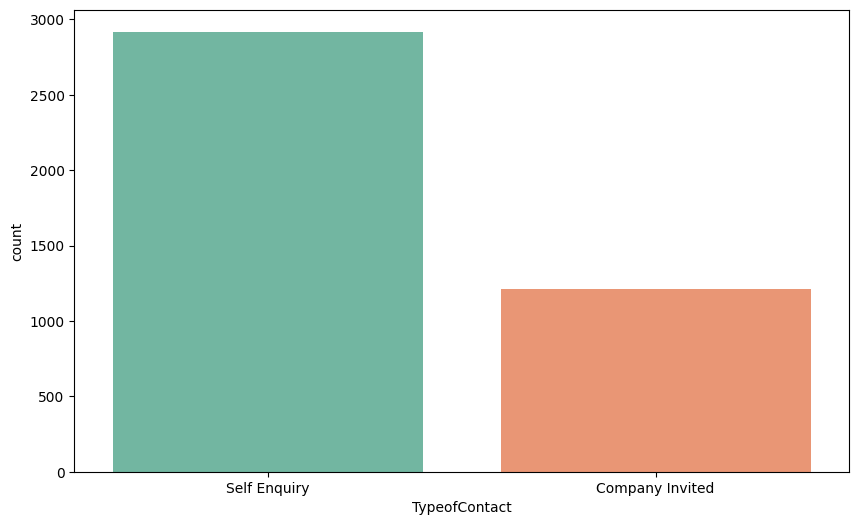

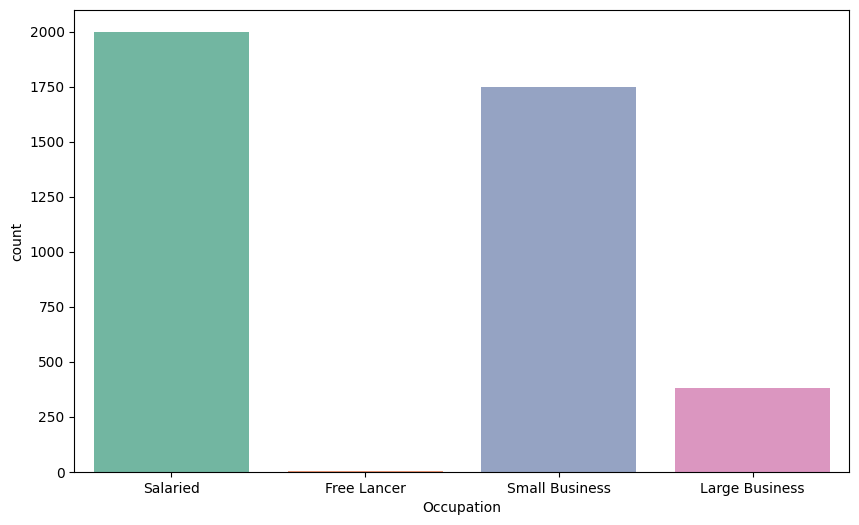

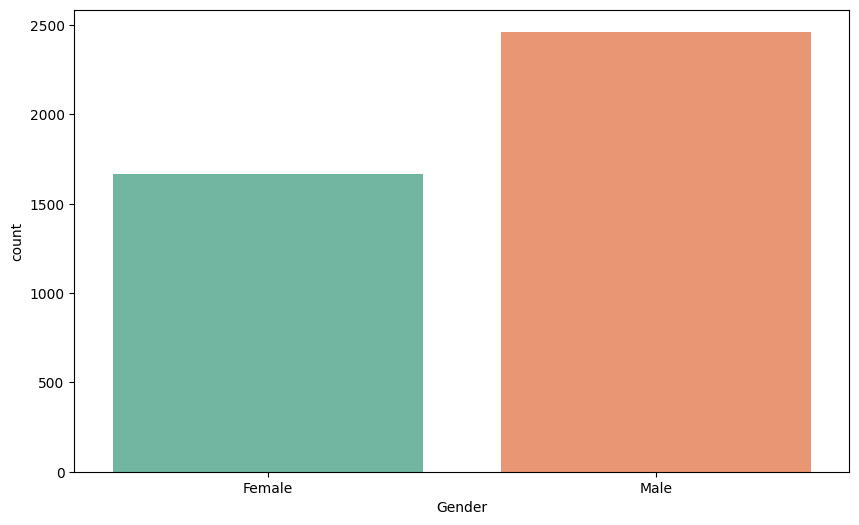

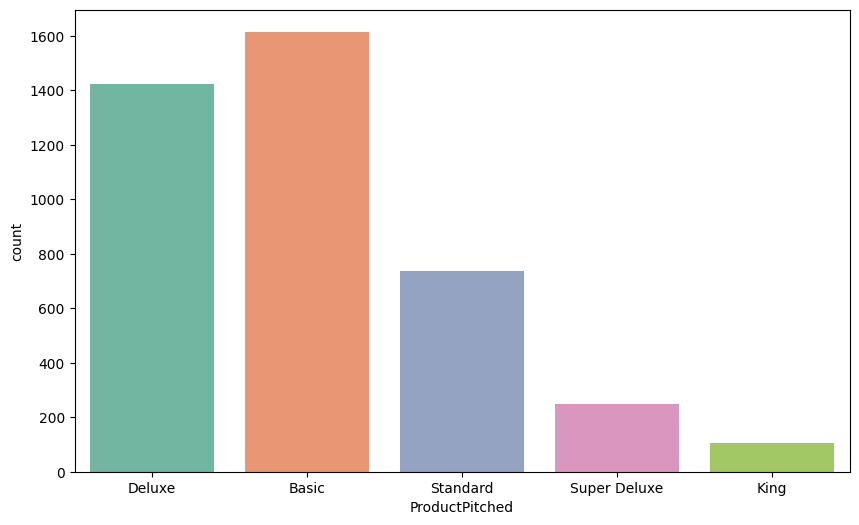

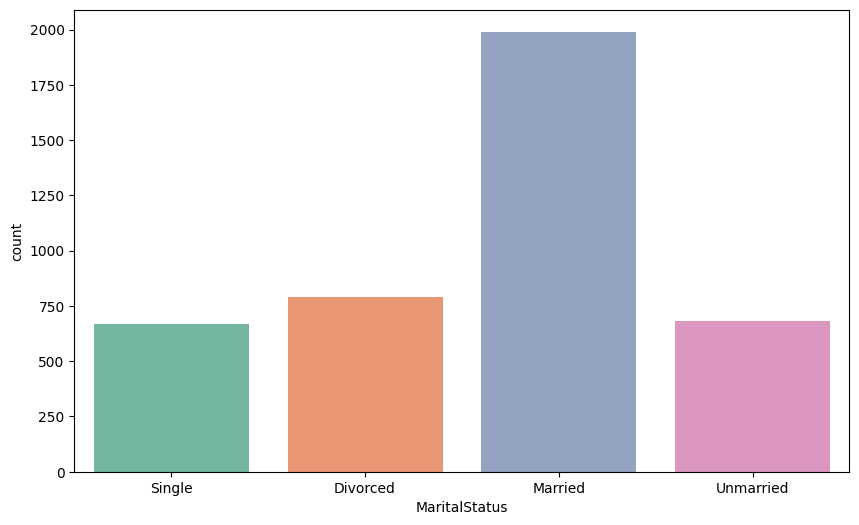

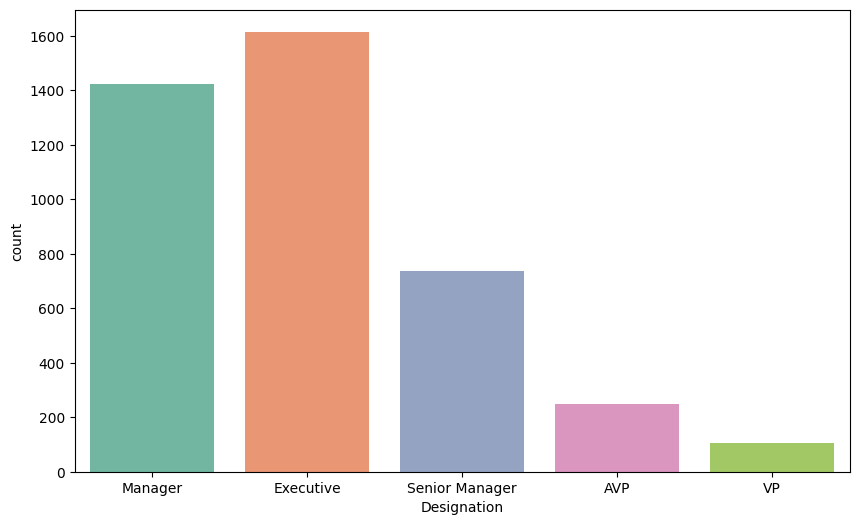

In [219]:
# Univariant graph
for cols in cat_col:
    plt.figure(figsize=(10,6))
    sns.countplot(x=df[cols], palette='Set2')
    plt.show()

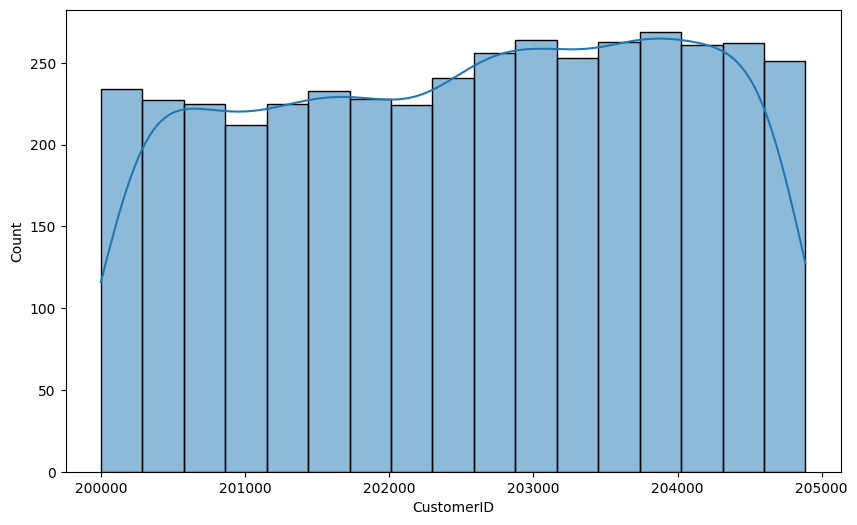

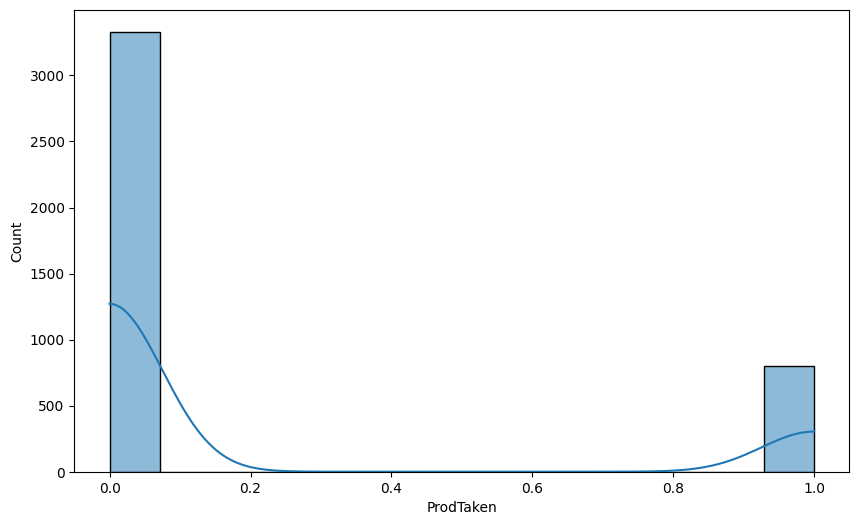

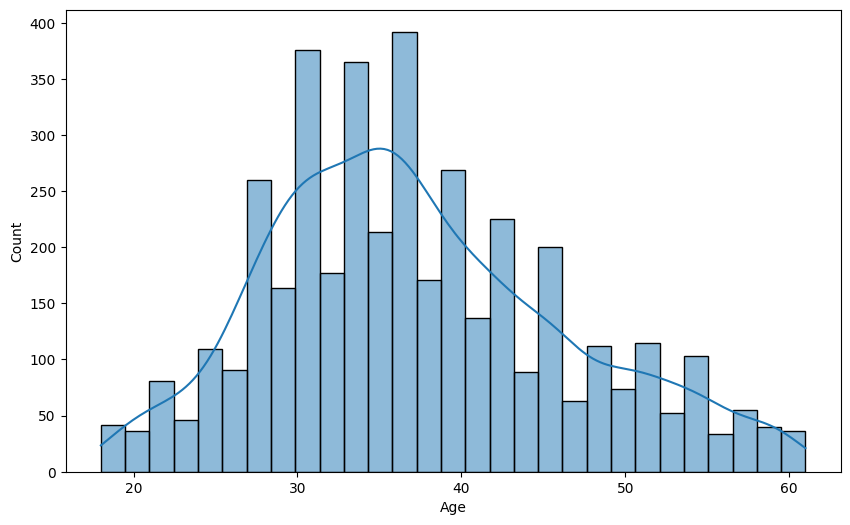

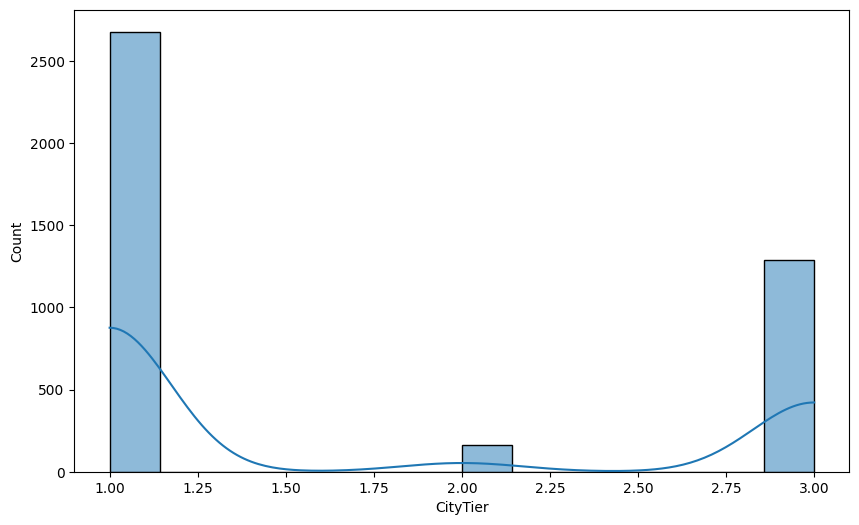

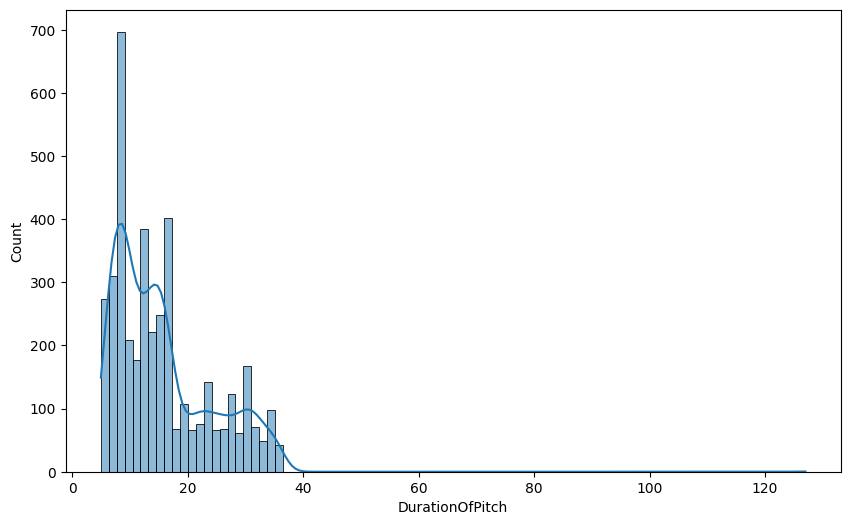

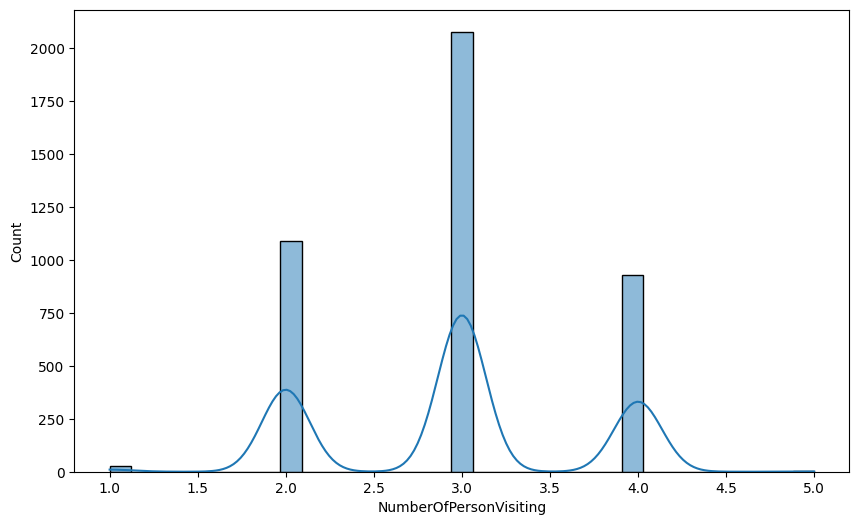

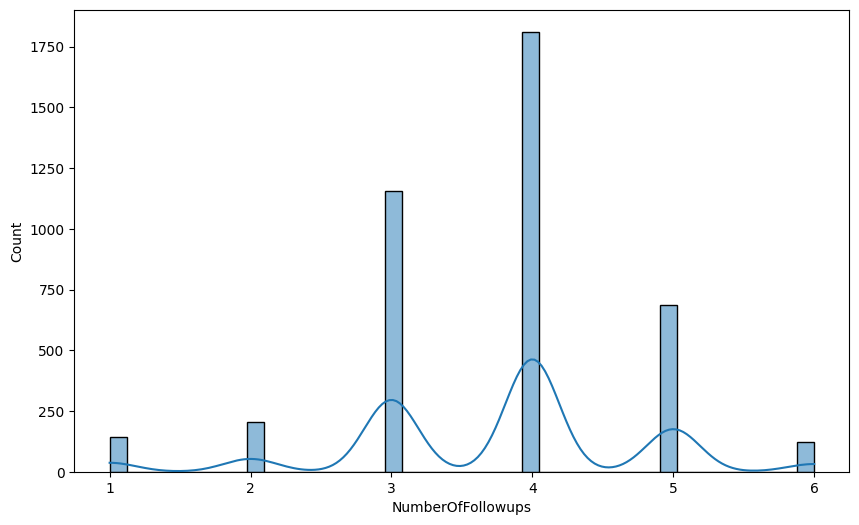

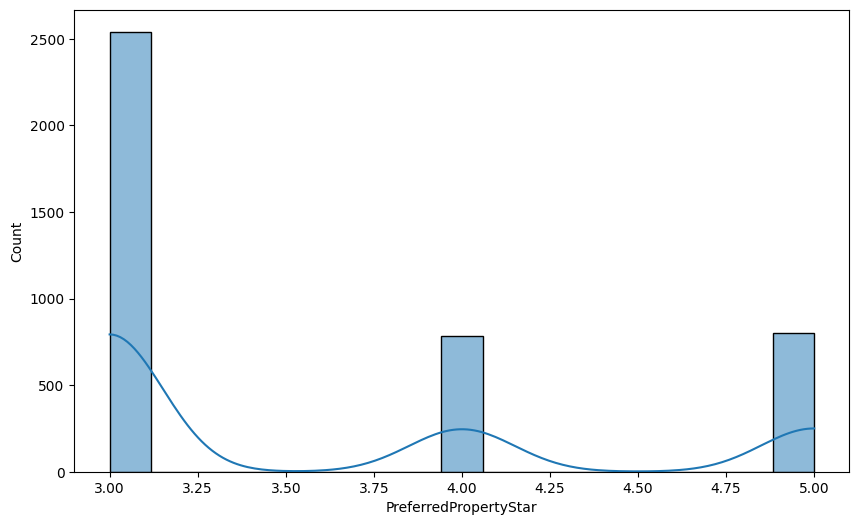

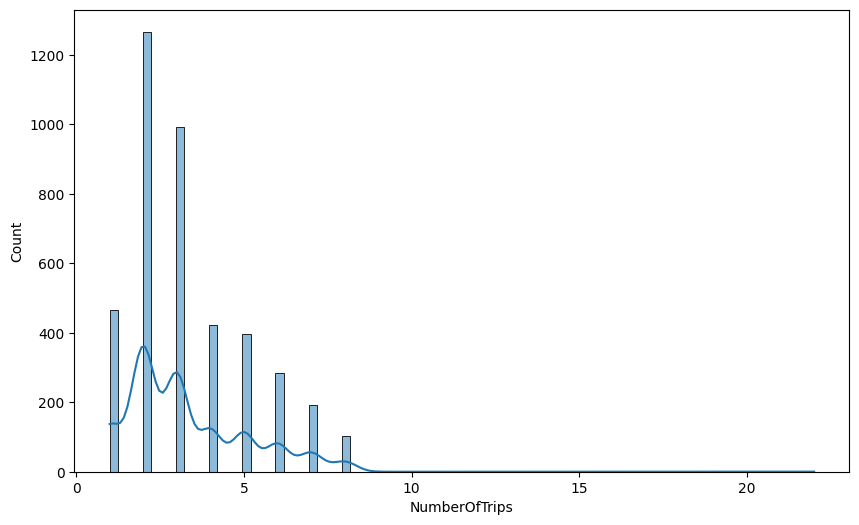

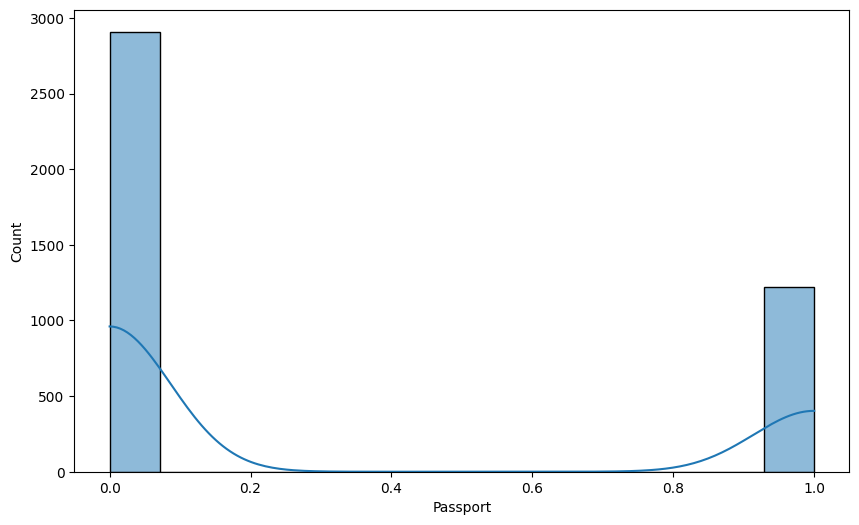

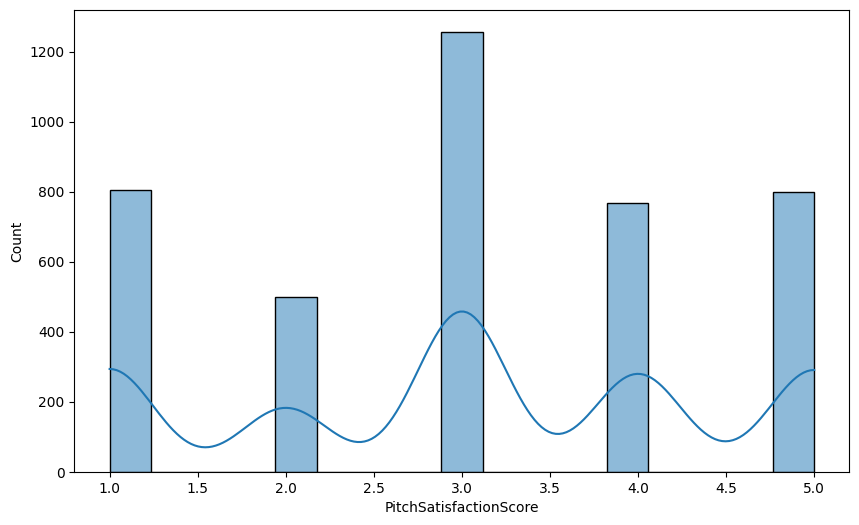

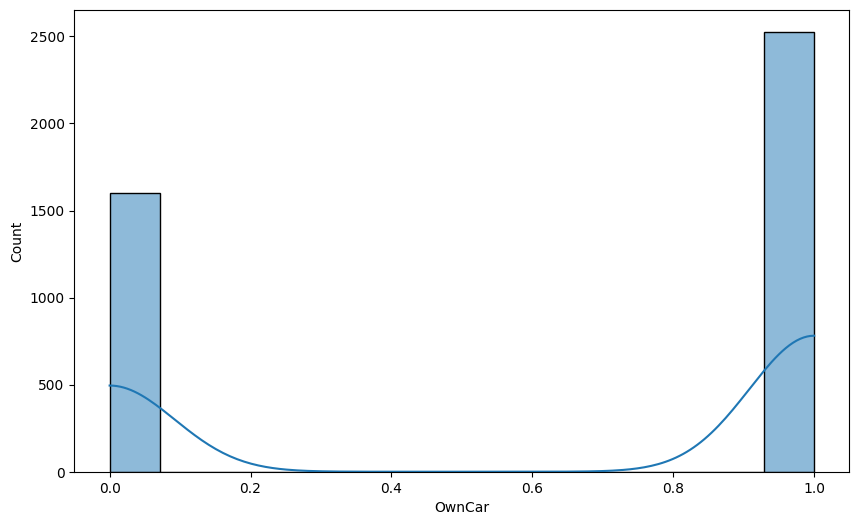

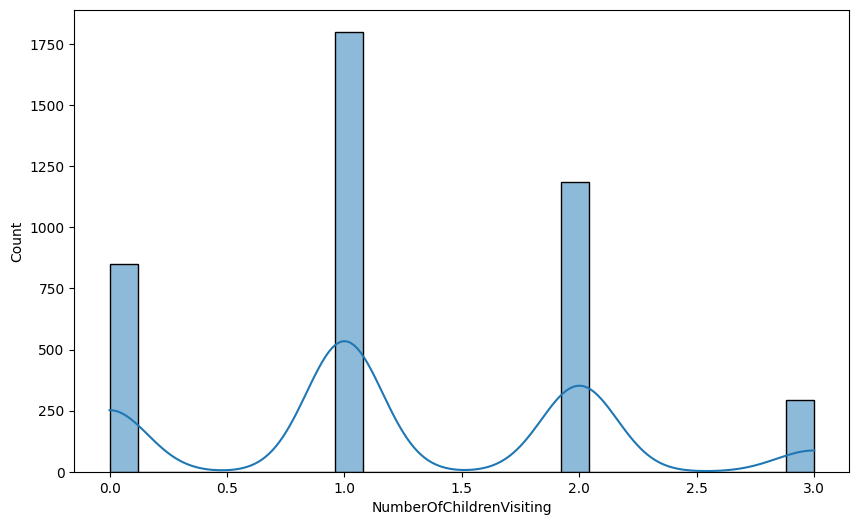

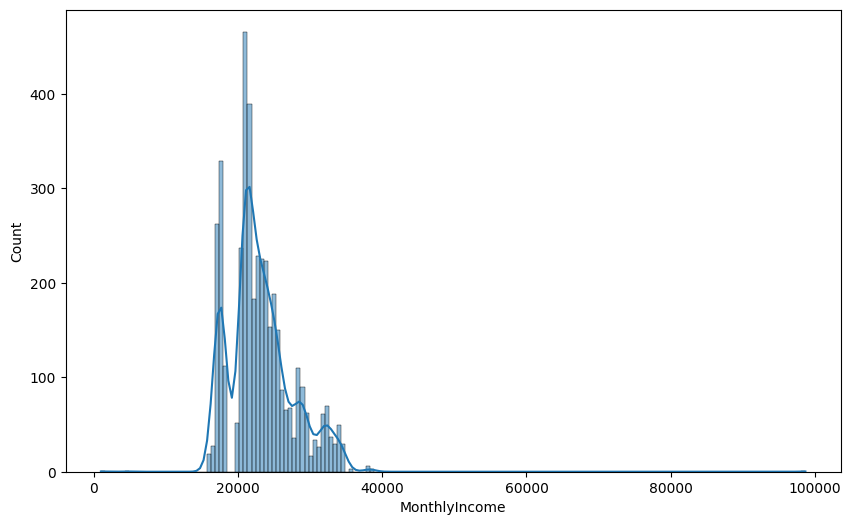

In [220]:
for cols in num_col:
    plt.figure(figsize=(10, 6))
    sns.histplot(x=df[cols], kde=True, palette='Set2')
    plt.show()

In [221]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [222]:
# Bi-variant

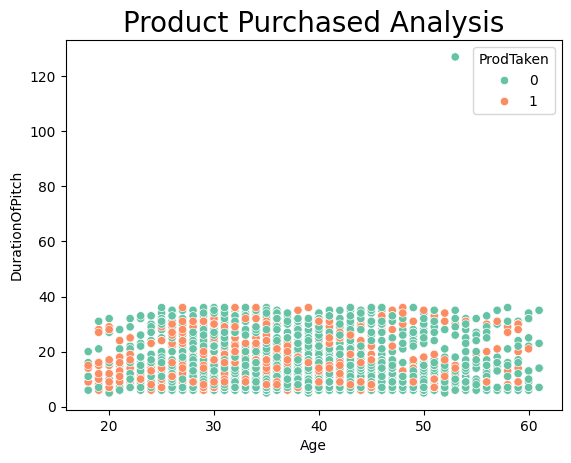

In [223]:
sns.scatterplot(x=df['Age'], y=df['DurationOfPitch'], hue=df['ProdTaken'],palette='Set2')
plt.title('Product Purchased Analysis', fontsize=20)
plt.show()

In [224]:
# 20-40 age group have purchased more product
# 20 age group have taken less time to  purchas product

In [225]:
cross_tab = pd.crosstab(df['MaritalStatus'], df['ProdTaken'], normalize ='index')

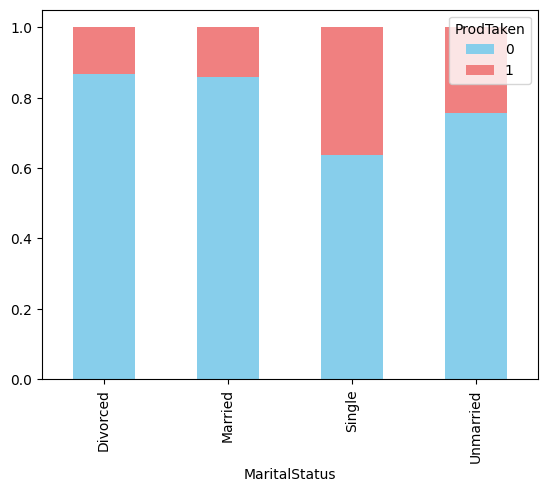

In [226]:
cross_tab.plot(kind='bar',stacked=True, color=['skyblue', 'lightcoral'])
plt.show()

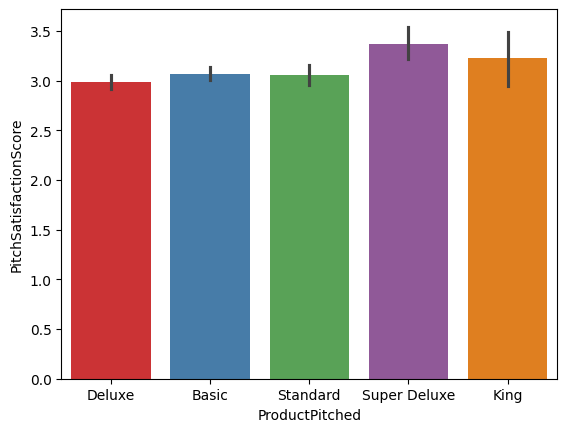

In [227]:
sns.barplot(x=df['ProductPitched'], y=df['PitchSatisfactionScore'], palette='Set1')
plt.show()

In [228]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

<Axes: xlabel='NumberOfFollowups', ylabel='PitchSatisfactionScore'>

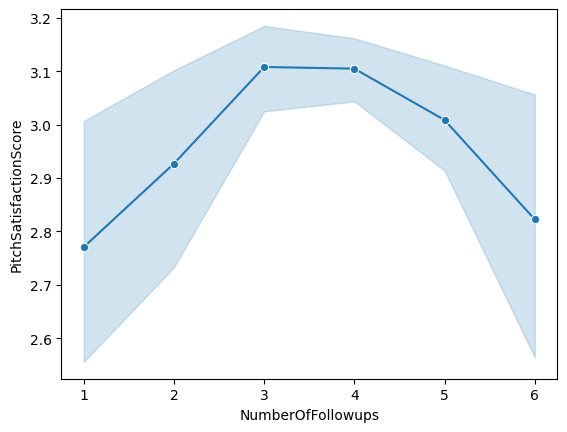

In [229]:
sns.lineplot(x=df['NumberOfFollowups'], y=df['PitchSatisfactionScore'], marker='o',palette='coolwarm')

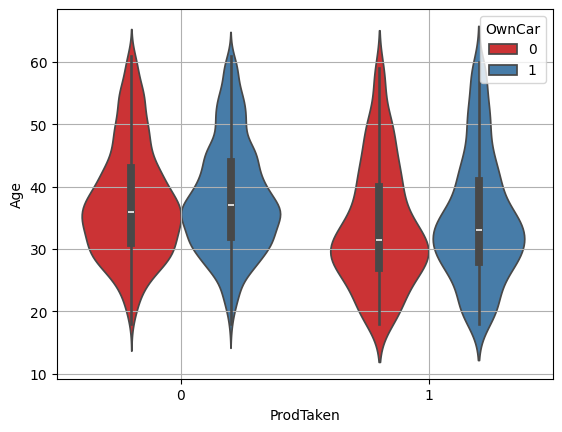

In [230]:
# multivariant plot
sns.violinplot(x='ProdTaken', y='Age',hue='OwnCar', data=df, palette='Set1')
plt.grid()
plt.show()

In [231]:
# 3D plot
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0.92, '3d plot')

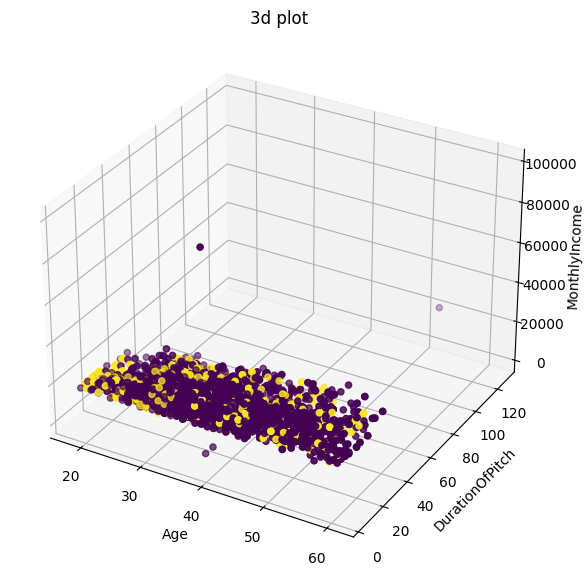

In [232]:
fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'], df['DurationOfPitch'], df['MonthlyIncome'], c=df['ProdTaken'])
ax.set_xlabel('Age')
ax.set_ylabel('DurationOfPitch')
ax.set_zlabel('MonthlyIncome')
ax.set_title('3d plot')

<Axes: >

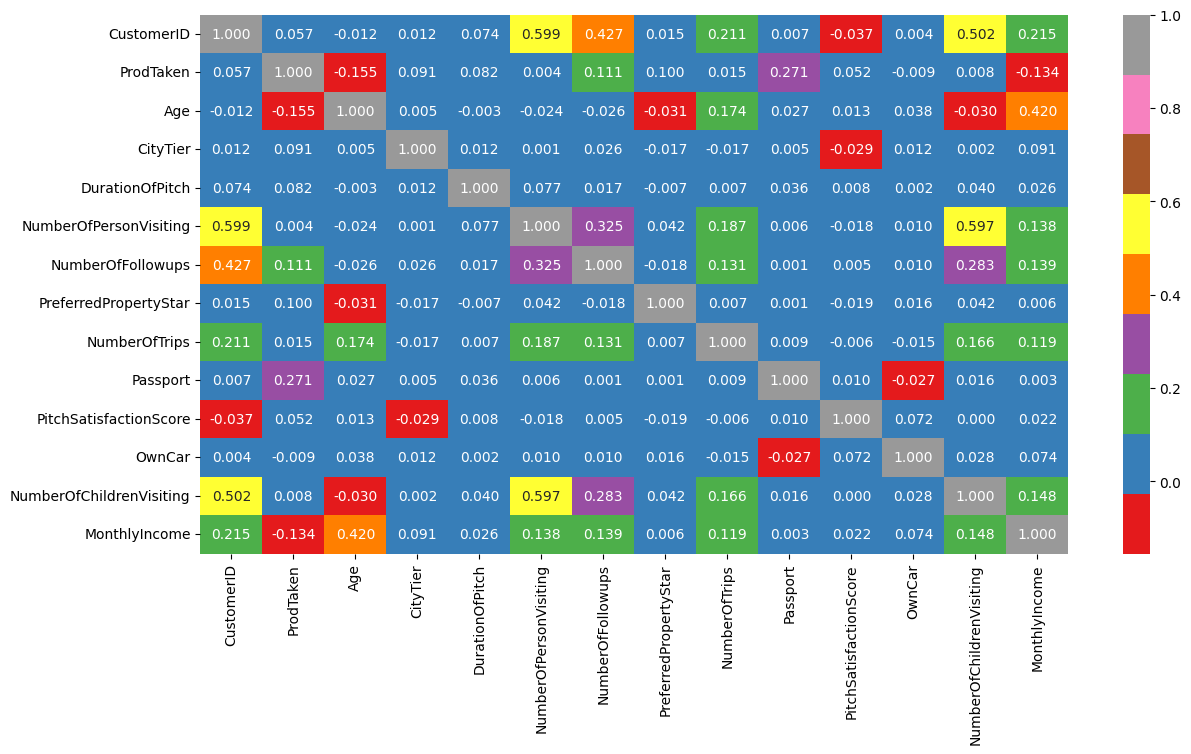

In [233]:
numeric_col = df.select_dtypes(include='number')
plt.figure(figsize=(14, 7))
sns.heatmap(numeric_col.corr(), annot=True, fmt='.3f', cmap='Set1')

In [234]:
numeric_col

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
0,200000,1,41.0,3,6.0,3,3.0,3.0,1.0,1,2,1,0.0,20993.0
1,200001,0,49.0,1,14.0,3,4.0,4.0,2.0,0,3,1,2.0,20130.0
2,200002,1,37.0,1,8.0,3,4.0,3.0,7.0,1,3,0,0.0,17090.0
3,200003,0,33.0,1,9.0,2,3.0,3.0,2.0,1,5,1,1.0,17909.0
5,200005,0,32.0,1,8.0,3,3.0,3.0,1.0,0,5,1,1.0,18068.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,3,9.0,3,5.0,4.0,2.0,1,1,1,1.0,26576.0
4884,204884,1,28.0,1,31.0,4,5.0,3.0,3.0,1,3,1,2.0,21212.0
4885,204885,1,52.0,3,17.0,4,4.0,4.0,7.0,0,1,1,3.0,31820.0
4886,204886,1,19.0,3,16.0,3,4.0,3.0,3.0,0,5,0,2.0,20289.0


In [235]:
discreate_feat = [feature for feature in num_col if len(df[feature].unique())<=25]
print(f"Total discreate_features {len(discreate_feat)}")

Total discreate_features 10


In [236]:
X=df.drop(['ProdTaken'], axis=1)
X

,CustomerID,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
5,200005,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


In [237]:
Y= df['ProdTaken']
Y

0       1
1       0
2       1
3       0
5       0
       ..
4883    1
4884    1
4885    1
4886    1
4887    1
Name: ProdTaken, Length: 4128, dtype: int64

In [238]:
cols_features = X.select_dtypes(include='object').columns
num_features  = X.select_dtypes(exclude='object').columns


In [239]:
from sklearn.model_selection import train_test_split

In [240]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [241]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [242]:
oh_transformer= OneHotEncoder(drop='first')
Stand_transformer = StandardScaler()

In [243]:
processor = ColumnTransformer([
    ("OneHotEncoder",oh_transformer,cols_features),
    ("StandardScaler",Stand_transformer,num_features)
])

In [244]:
processor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['CustomerID', 'Age', 'CityTier', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome'],
      dtype='object'))])

In [245]:
X_train=processor.fit_transform(X_train)

In [246]:
X_test = processor.transform(X_test)